# Probability-insighter
https://github.com/alvason/probability-insighter

### Exponential random distribution 

Previous running time is 2016-06-09 15:56:41.020606


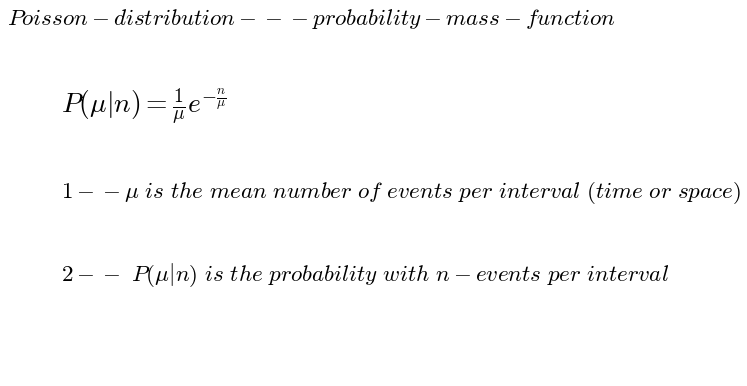

In [1]:
'''
author: Alvason Zhenhua Li
date:   03/19/2015
'''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
dir_path = '/Users/al/Desktop/GitHub/probability-insighter/figure'
file_name = 'exponential-distribution'

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 7)
numberingFig = 0

# plotting
figure_name = '-equation'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(9, 6))
plt.axis('off')
plt.title(r'$ Poisson-distribution---probability-mass-function $',fontsize = AlvaFontSize)
plt.text(0, 3.0/4, r'$ P(\mu|n) = \frac{1}{\mu} e^{-\frac{n}{\mu}} $', fontsize = 1.2*AlvaFontSize)
plt.text(0, 2.0/4, r'$ 1-- \mu \ is \ the \ mean \ number \ of \ events \ per \ interval \ (time \ or \ space) $', fontsize = AlvaFontSize)
plt.text(0, 1.0/4, r'$ 2-- \ P(\mu|n) \ is \ the \ probability \ with \ n-events \ per \ interval $',
         fontsize = AlvaFontSize)
plt.savefig(save_figure, dpi = 300)
plt.show()

total-probability = 0.903494


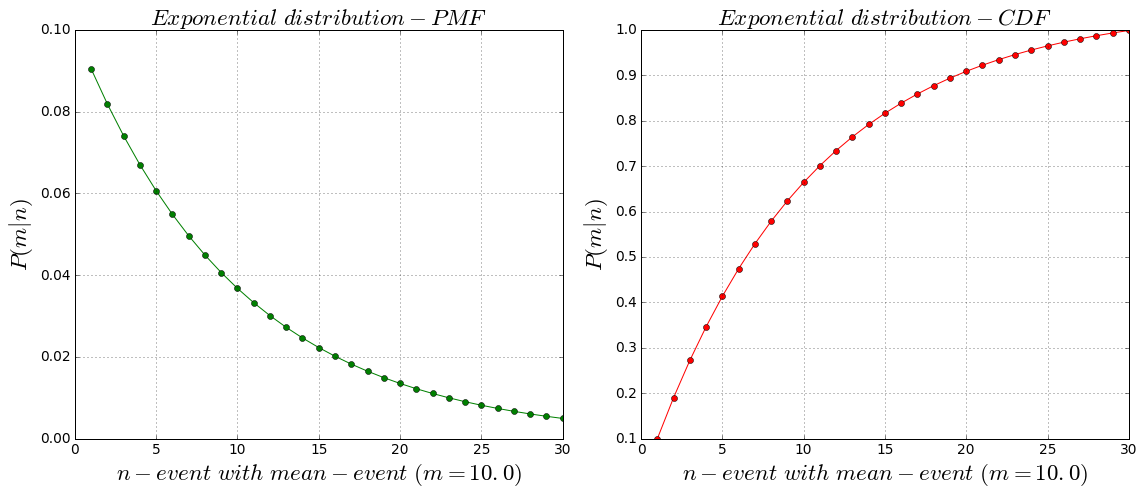

In [19]:
def AlvaExpD(i, meanP):
    P_distribution = 0.0*i
    P_distribution[:] = (1/meanP)*np.exp(-i/meanP)
    return (P_distribution)

def AlvaExpC(m, meanP, expD):
    B_C = 0.0*m
    for j in range(np.size(m)):
        for k in range(m[j]):
            i = np.arange(k + 1)
            B_distribution = expD(i, meanP)
        B_C[j] = B_C[j] + B_distribution.sum()
    return (B_C)

total_event = int(30)
i_event = np.arange(1, total_event + 1)
totalPoint_Input = total_event
meanP = total_event/3.0

exp_D = AlvaExpD(i_event, meanP)

print ('total-probability = {:f}'.format(exp_D.sum()))
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(i_event, exp_D, marker ='o', color = 'green')
plt.title(r'$ Exponential \ distribution-PMF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ with \ mean-event \ (m = {:}) $'.format(meanP), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(m|n) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.grid(True)
# plotting2
i_event = np.arange(1, total_event + 1)
exp_C = AlvaExpC(i_event, meanP, AlvaExpD)
plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(i_event, exp_C, marker ='o', color = 'red')

plt.title(r'$ Exponential \ distribution-CDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ with \ mean-event \ (m = {:}) $'.format(meanP), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(m|n) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.grid(True)
figure.tight_layout()
plt.show()

total-probability = 0.999999294392


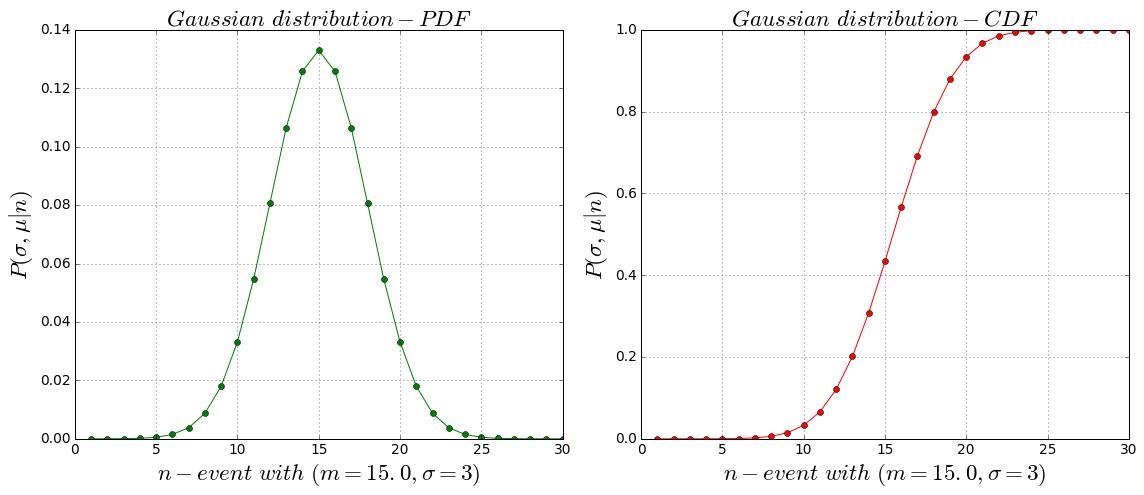

In [21]:
def AlvaGaussianD(i, meanP, deviationP):
    G_distribution = 0.0*i
    constantD = (2*np.pi)**(0.5) * deviationP
    constantN = 1.0 / constantD
    G_distribution[:] = constantN * np.exp(-(0.5)*((i[:] - meanP)/deviationP)**2)
    return (G_distribution)

def AlvaGaussianC(m, meanP, deviationP, gaussianD):
    B_C = 0.0*m
    for j in range(np.size(m)):
        for k in range(m[j]):
            i = np.arange(k + 1)
            B_distribution = gaussianD(i, meanP, deviationP)
        B_C[j] = B_C[j] + B_distribution.sum()
    return (B_C)

total_event = int(30)
i_event = np.arange(1, total_event + 1)
totalPoint_Input = total_event
meanP = total_event/2.0
deviationP = 3

gaussian_D = AlvaGaussianD(i_event, meanP, deviationP)

print ('total-probability = {:}'.format(gaussian_D.sum()))
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(i_event, gaussian_D, marker ='o', color = 'green')
plt.title(r'$ Gaussian \ distribution-PDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ with \ (m = {:}, \sigma = {:}) $'.format(meanP, deviationP), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(\sigma, \mu|n) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.grid()
# plotting2
i_event = np.arange(1, total_event + 1)
gaussian_C = AlvaGaussianC(i_event, meanP, deviationP, AlvaGaussianD)
plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(i_event, gaussian_C, marker ='o', color = 'red')
plt.title(r'$ Gaussian \ distribution-CDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ with \ (m = {:}, \sigma = {:}) $'.format(meanP, deviationP), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(\sigma, \mu|n) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.grid()
figure.tight_layout()
plt.show()

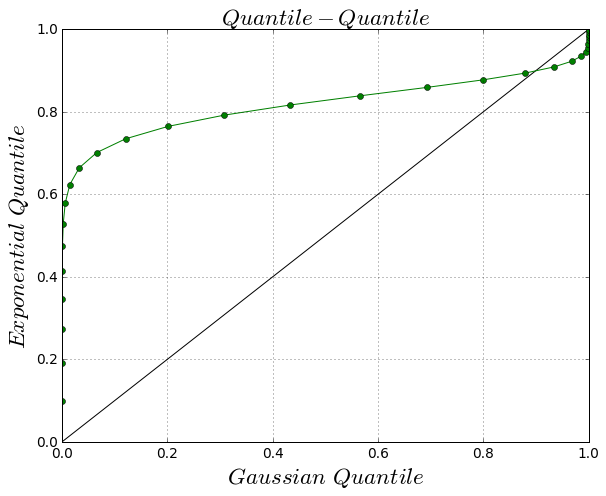

In [23]:
'''Quantile-Quantile'''
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
window = figure.add_subplot(1, 2, 1)
window.plot(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), color = 'black', linewidth = 1)
window.plot(gaussian_C, exp_C, marker ='o', color = 'green')
plt.title(r'$ Quantile-Quantile $', fontsize = AlvaFontSize)
plt.xlabel(r'$ Gaussian \ Quantile $'.format(), fontsize = AlvaFontSize)
plt.ylabel(r'$ Exponential \ Quantile $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.grid()
figure.tight_layout()
plt.show()

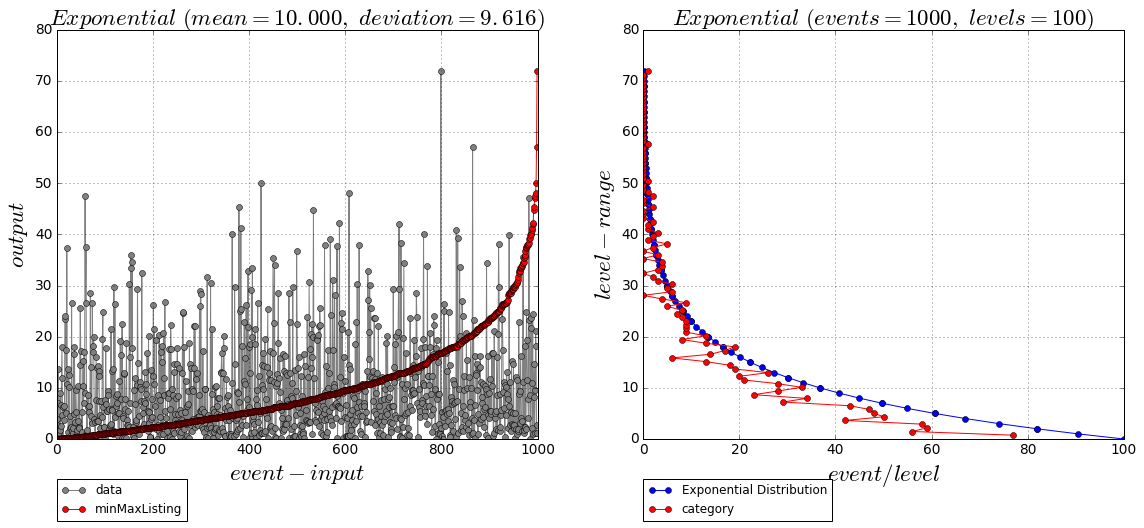

In [4]:
'''Exponential randomness --- Exponential distribution'''
total_event = int(1000)
gInput = np.arange(total_event)
meanP = 10.0
randomSeed = np.random.exponential(meanP, total_event)

sumP = 0
for i in range(total_event):
    sumP = sumP + (meanP - randomSeed[i])**2
deviationP = (sumP/total_event)**(1.0/2)

totalLevel = int(total_event/10)
category = alva.AlvaLevel(randomSeed, totalLevel, False)
gLevel = category[0]
gLevel_int = gLevel.astype(int)
numberLevel = category[1]
#print ('level =', gLevel)
#print ('level_int =', gLevel_int)

exp_D = total_event*AlvaExpD(gLevel_int, meanP)
# plotting
figure_name = ''
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(gInput, randomSeed, color = 'gray', marker = 'o', label = 'data')
plot1.plot(gInput, alva.AlvaMinMax(randomSeed), color = 'red', marker = 'o', label = 'minMaxListing')
if total_event < 100:
    plot1.set_xticks(gInput, minor = True) 
    plot1.set_yticks(randomSeed, minor = True)
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Exponential \ (mean = {:1.3f},\ deviation = {:1.3f}) $'.format(meanP, deviationP), fontsize = AlvaFontSize)
plt.xlabel(r'$ event-input $', fontsize = AlvaFontSize)
plt.ylabel(r'$ output $', fontsize = AlvaFontSize)
plt.legend(loc = (0, -0.2))
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(exp_D, gLevel_int, color = 'blue', marker = 'o', label = 'Exponential Distribution') 
plot2.plot(numberLevel, gLevel, color = 'red', marker = 'o', label = 'category')
if totalLevel < 100:
    plot2.set_xticks(numberLevel, minor = True) 
    plot2.set_yticks(gLevel, minor = True)
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Exponential \ (events = {:},\ levels = {:}) $'.format(total_event, totalLevel)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ event/level $', fontsize = AlvaFontSize)
plt.ylabel(r'$ level-range $', fontsize = AlvaFontSize)
plt.legend(loc = (0, -0.2))
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

figure.tight_layout()
plt.savefig(save_figure, dpi = 300)
plt.show()